The general workflow to find an appropriate model size is to start with relatively few layers and parameters, and increase the size of the layers or add new layers until you see diminishing returns with regard to validation loss.

In [3]:
from keras.datasets import imdb

In [4]:
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words = 2500)

In [5]:
import numpy as np
def vectorize_sequences(sequences,dimension=2500):
    results = np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
from keras import layers
from keras import models
import matplotlib.pyplot as plt

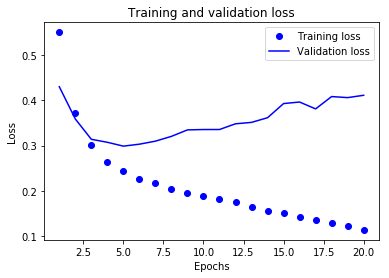

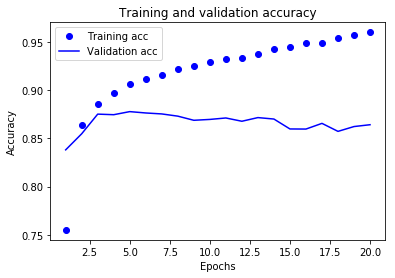

In [9]:
#original model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(2500,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
history = model.fit(partial_x_train,partial_y_train,
                    epochs=20,batch_size=512,
                    verbose=0,
                    validation_data = (x_val,y_val))
history_dict = history.history
history_dict.keys()
[u'acc',u'loss',u'val_acc',u'val_loss']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(history_dict['acc'])+1)
plt.figure()
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.figure()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

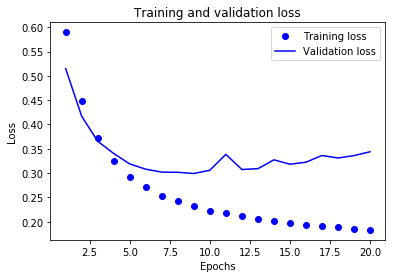

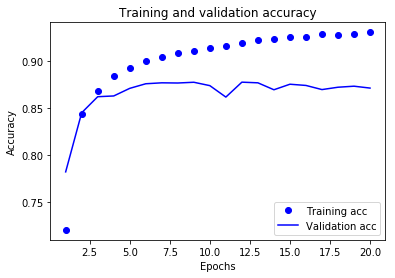

In [10]:
#lowering the capacity of the network
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(2500,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
history = model.fit(partial_x_train,partial_y_train,
                    epochs=20,batch_size=512,
                    verbose=0,
                    validation_data = (x_val,y_val))
history_dict = history.history
history_dict.keys()
[u'acc',u'loss',u'val_acc',u'val_loss']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(history_dict['acc'])+1)
plt.figure()
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.figure()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

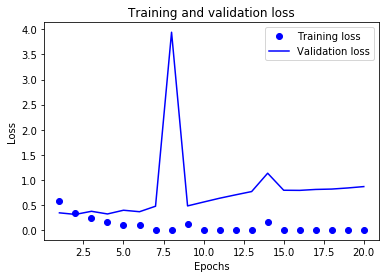

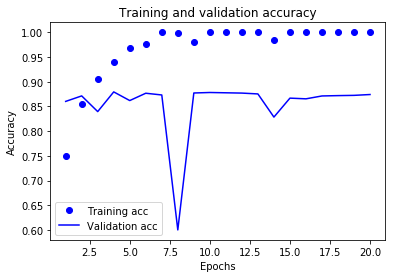

In [12]:
#increasing the capacity of the network
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(2500,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
history = model.fit(partial_x_train,partial_y_train,
                    epochs=20,batch_size=512,
                    verbose=0,
                    validation_data = (x_val,y_val))
history_dict = history.history
history_dict.keys()
[u'acc',u'loss',u'val_acc',u'val_loss']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(history_dict['acc'])+1)
plt.figure()
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.figure()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

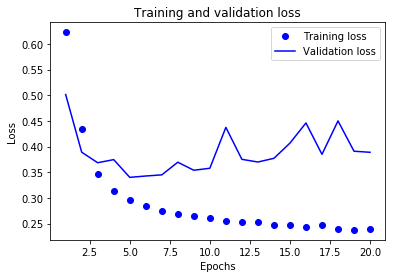

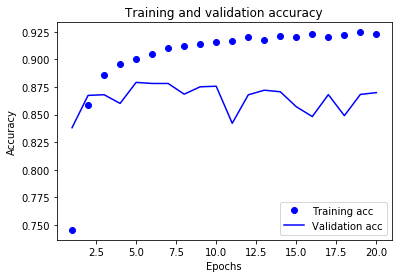

In [14]:
#L2 weight regularization to the original model
from keras import regularizers
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                       activation='relu', input_shape=(2500,)))
model.add(layers.Dense(16,kernel_regularizer=regularizers.l2(0.001),
                       activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
history = model.fit(partial_x_train,partial_y_train,
                    epochs=20,batch_size=512,
                    verbose=0,
                    validation_data = (x_val,y_val))
history_dict = history.history
history_dict.keys()
[u'acc',u'loss',u'val_acc',u'val_loss']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(history_dict['acc'])+1)
plt.figure()
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.figure()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

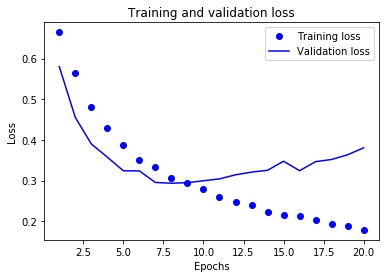

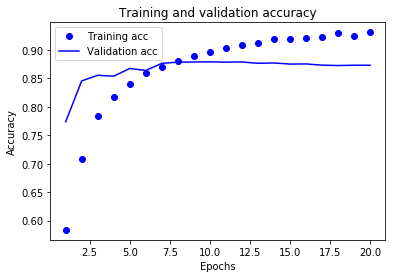

In [15]:
#adding droupout layer 
from keras import regularizers
model = models.Sequential()
model.add(layers.Dense(16,activation='relu', input_shape=(2500,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
history = model.fit(partial_x_train,partial_y_train,
                    epochs=20,batch_size=512,
                    verbose=0,
                    validation_data = (x_val,y_val))
history_dict = history.history
history_dict.keys()
[u'acc',u'loss',u'val_acc',u'val_loss']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(history_dict['acc'])+1)
plt.figure()
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.figure()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()